In [1]:
import torch
from skimage.io import imread,imsave
from skimage import img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


In [2]:
filepath_originals = "../hida_workspace/HackathonCovidData/trainSet/normalizedImg/"
filepath_masks = "../hida_workspace/HackathonCovidData/trainSet/normalizedImg/pred_20210428_18_59/"


In [3]:
filenames_originals = list(set(glob(filepath_originals+'*.png')))

patients = [ll.split('/')[-1].split('.')[0] for ll in filenames_originals]

for patient in range(len(patients)):
    #f_original = filenames_originals[fIdx]
    #f_masks = filenames_masks[fIdx]
    
    f_original = filepath_originals + patients[patient] + '.png'
    f_masks = filepath_masks + patients[patient] + '_mask.png'
    
    #print(f_original)
    #print(f_masks)
    original = imread(f_original)
    mask = imread(f_masks)
    masked = original*mask
    imsave(f_masks.replace('_mask.png','_masked.png'),img_as_ubyte(masked/masked.max()))
    

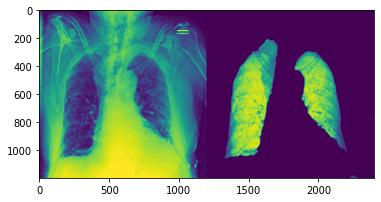

In [4]:
f = filepath_masks + "P_1_1_mask.png"
mask = imread(f)

f = filepath_originals + "P_1_1.png"
original = imread(f)

masked = mask*original


tmp = np.concatenate((original, original*mask), axis=1)
plt.imshow(tmp)